In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train_Prophet.csv')
data.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,1.449080,2.342993,2.056391,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0.121611,0.212765,0.400858,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,1.101236,1.201547,1.409917,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,1.088499,0.977286,1.203079,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,5.707742,6.599575,8.610103,0,0,0,0,0,0,0


In [139]:
len(data)

15890

In [4]:
inter_data = pd.read_csv('data/sales_Prophet.csv')
inter_data = inter_data.drop(0, axis=0)
inter_data.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,2724.076759,4765.930801,8979.210081,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,13376.382490,14668.005550,17114.231080,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,4462.917490,4016.850800,4909.120207,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,28107.296940,33609.420960,44097.471270,0,0,0,0,0,0,0
5,5,B002-00003-00002,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,46644.385440,43122.241450,41206.902390,0,0,0,0,0,0,0


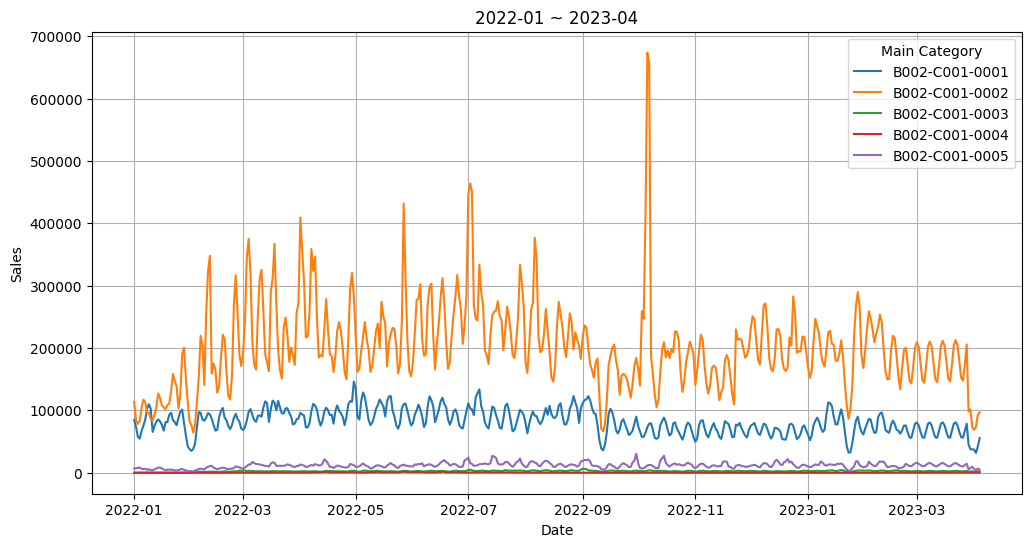

In [5]:
# 아래 코드는 보간이 잘 되었는지 시각화 하는 코드입니다.
df = data.copy()

# 대분류를 기준으로 2022-01-01부터 2023-04-04까지의 값을 더함
df_grouped = df.groupby('대분류').sum().iloc[:, 5:].T

# 날짜를 Datetime 형식으로 변환
df_grouped.index = pd.to_datetime(df_grouped.index)

# 시각화
plt.figure(figsize=(12, 6))
for col in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[col], label=col)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('2022-01 ~ 2023-04')
plt.grid(True)
plt.legend(title='Main Category')
plt.show()

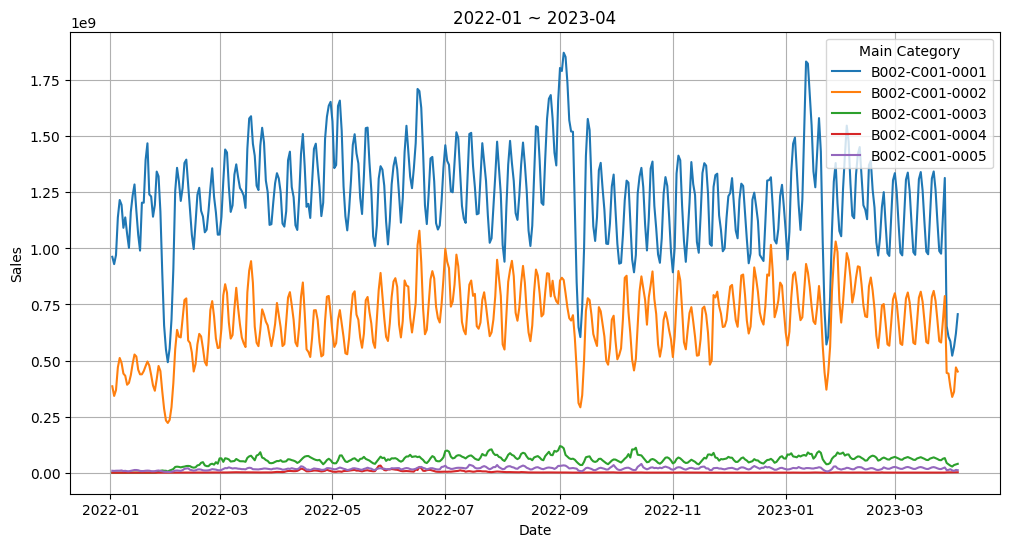

In [6]:
# 아래 코드는 보간이 잘 되었는지 시각화 하는 코드입니다.
df = inter_data.copy()
transform = df.iloc[:, 6:].astype(float)

df = pd.concat([df.iloc[:, :6], transform], axis=1)
df.drop('ID', axis=1, inplace=True)

# # 대분류를 기준으로 2022-01-01부터 2023-04-04까지의 값을 더함
df_grouped = df.groupby('대분류').sum().iloc[:, 5:].T

df_grouped.head()

# # 날짜를 Datetime 형식으로 변환
df_grouped.index = pd.to_datetime(df_grouped.index)

# 시각화
plt.figure(figsize=(12, 6))
for col in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[col], label=col)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('2022-01 ~ 2023-04')
plt.grid(True)
plt.legend(title='Main Category')
plt.show()

In [4]:
cat_df_list = []

# Iterate over the rows of the data
for index, row in tqdm(data.iterrows()):
    cat_list = np.tile(row[:6].values, (len(row[6:]), 1)) # 첫 6개 데이터를 반복
    cat_df = pd.DataFrame(cat_list, columns=data.columns[:6]) # 반복된 데이터를 데이터프레임으로 변환
    cat_df['판매량'] = row[6:].values # 판매량 데이터 추가
    cat_df_list.append(cat_df)

cat_df = pd.concat(cat_df_list, axis=0)
cat_df.reset_index(drop=True, inplace=True)
cat_df

15890it [00:03, 4827.20it/s]


,ID,제품,대분류,중분류,소분류,브랜드,판매량
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0
1,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0
2,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0
3,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0
4,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0
...,...,...,...,...,...,...,...
7293505,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0
7293506,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0
7293507,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0
7293508,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0


In [5]:
sale_data = pd.read_csv('./data/sales.csv')
sale_data.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cat_df_list = []

for index, row in tqdm(sale_data.iterrows()):
    cat_df_list.append(row[6:].values)

sales_amount = np.concatenate(cat_df_list).flatten()
cat_df['판매금액'] = sales_amount

cat_df.reset_index(drop=True, inplace=True)

15890it [00:00, 25608.88it/s]


In [7]:
cat_df['판매량'] = cat_df['판매량'].astype(int)
cat_df['판매금액'] = cat_df['판매금액'].astype(int)

In [8]:
cat_df['개당판매금액'] = cat_df['판매금액'] / cat_df['판매량']

<Axes: >

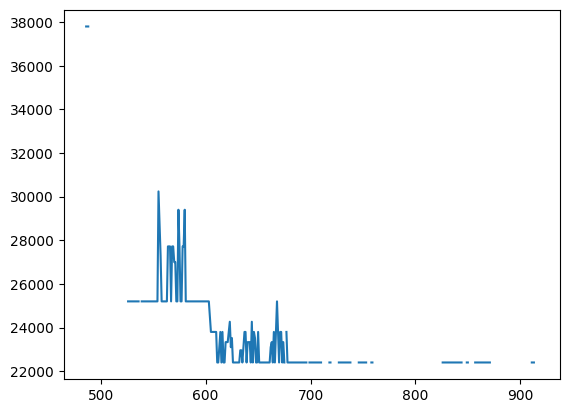

In [9]:
cat_df[cat_df['ID'] == 1]['개당판매금액'].plot()

In [15]:
def fill_missing_values(group):
    return group.fillna(method='ffill').fillna(method='bfill')

cat_df['개당판매금액'] = cat_df.groupby('ID')['개당판매금액'].transform(fill_missing_values)

<Axes: >

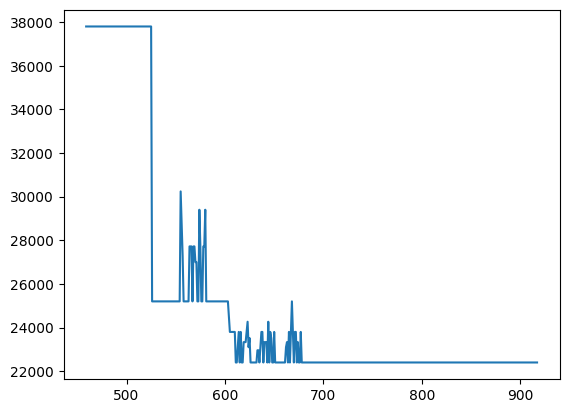

In [136]:
cat_df[cat_df['ID'] == 1]['개당판매금액'].plot()

In [10]:
cat_df.drop('판매금액', axis=1, inplace=True)
cat_df

,ID,제품,대분류,중분류,소분류,브랜드,판매량,개당판매금액
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,NaN
1,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,NaN
2,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,NaN
3,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,NaN
4,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,NaN
...,...,...,...,...,...,...,...,...
7293505,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0,NaN
7293506,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0,NaN
7293507,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0,NaN
7293508,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,0,NaN


In [11]:
brand_cnt_df = pd.read_csv('./data/brand_keyword_cnt.csv')
brand_cnt_df

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
1,B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
2,B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
3,B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
4,B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,2.32085,2.98810,3.611830,4.061500,3.669850,3.771390,3.031620,2.988100,3.133150,...,2.422390,2.422390,2.756010,2.32085,2.088770,1.98723,1.07339,1.929210,2.509420,1.78416
3166,B002-03795,0.14505,0.00000,0.087030,0.072520,0.087030,0.101530,0.072520,0.130540,0.116040,...,0.000000,0.072520,0.000000,0.10153,0.101530,0.00000,0.00000,0.000000,0.000000,0.00000
3167,B002-03796,0.00000,0.00000,0.000000,0.000000,0.000000,0.101530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.072520,0.07252
3168,B002-03798,0.14505,0.00000,0.116040,0.072520,0.116040,0.275600,0.217580,0.116040,0.101530,...,0.101530,0.087030,0.145050,0.17406,0.188560,0.11604,0.11604,0.087030,0.174060,0.10153


In [12]:
# Using a function to apply operations on each group of unique 'ID'
tqdm.pandas()

def process_group(sub_df):
    brand_name = sub_df['브랜드'].iloc[0]
    values = brand_cnt_df.loc[brand_cnt_df['브랜드'] == brand_name].iloc[:, 1:].values.flatten()
    sub_df['언급량'] = values
    return sub_df

# Group the DataFrame by 'ID' and apply the function
cat_df = cat_df.groupby('ID').progress_apply(process_group).reset_index(drop=True)

100%|██████████| 15890/15890 [00:07<00:00, 2004.90it/s]


In [13]:
target_y = cat_df['판매량']
cat_df.drop('판매량', axis=1, inplace=True)
cat_df['판매량'] = target_y

In [16]:
cat_df

,ID,제품,대분류,중분류,소분류,브랜드,개당판매금액,언급량,판매량
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,13500.0,0.84131,0
1,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,13500.0,0.91383,0
2,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,13500.0,1.45053,0
3,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,13500.0,2.42239,0
4,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,13500.0,1.87119,0
...,...,...,...,...,...,...,...,...,...
7293505,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,49800.0,5.51203,0
7293506,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,49800.0,3.52480,0
7293507,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,49800.0,4.03249,0
7293508,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,49800.0,5.88917,0


In [17]:
cat_df.to_csv('./data/preprocess_train_data.csv', index=False)